In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pycabnn as cbn

In [3]:
from pycabnn.util import HocParameterParser

h = HocParameterParser()
config_hoc = str("../test_data/params/Parameters.hoc")
h.load_file(config_hoc)


In [4]:
mlipop = cbn.create_population("MLI", h)
mlipop.load_somata("../../big_test_data/MLIcoordinates.dat")
mlipop.add_dendrites()

Successfully read ../../big_test_data/MLIcoordinates.dat.


In [5]:
mlipop.add_dendrites()

In [6]:
mlipop.dends.seg

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [3, 9],
       [3, 9],
       [3, 9]])

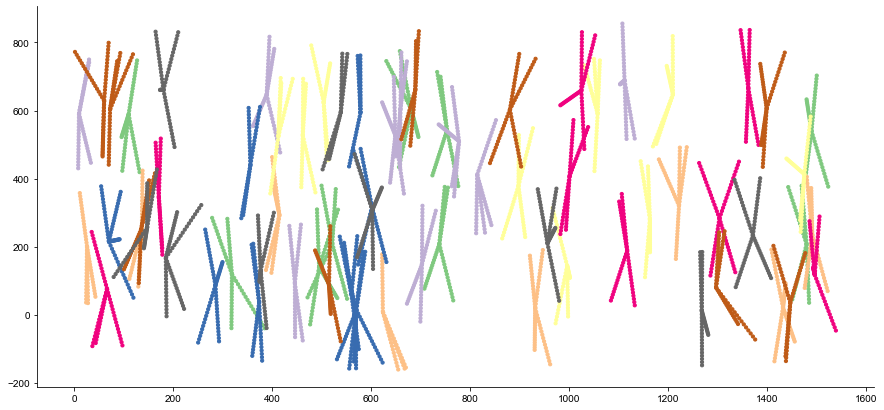

In [7]:
%matplotlib inline
ncell = 70
nidx = ncell*90*4

_, ax = plt.subplots(figsize=(15,7))
ax.scatter(mlipop.dends.coo[:nidx:5,0],mlipop.dends.coo[:nidx:5,1], 10, mlipop.dends.idx[:nidx:5], cmap='Accent')

In [8]:
mlipop.som.shape

(19724, 3)

In [65]:
from scipy.spatial import KDTree

tree = KDTree(mlipop.dends.coo)

In [66]:
cdist_gap = 3.3
d = tree.query_pairs(cdist_gap)

In [67]:
pps = [pp for pp in d if mlipop.dends.idx[pp[0]]!=mlipop.dends.idx[pp[1]]]

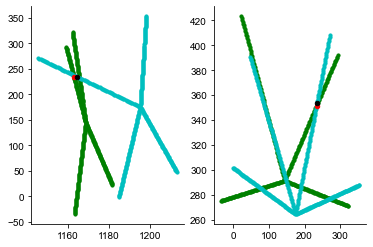

In [68]:
i = 32
c1 = pps[i][0]//360
c2 = pps[i][1]//360


def plot_gap_junc(i, x, y, ax):

    fdraw = ax.scatter
    fdraw(mlipop.dends.coo[(c1*360):((c1+1)*360),x],
                mlipop.dends.coo[(c1*360):((c1+1)*360),y], 10, 'g')
    fdraw(mlipop.dends.coo[(c2*360):((c2+1)*360),x],
                mlipop.dends.coo[(c2*360):((c2+1)*360),y], 10,'c')
    fdraw(mlipop.dends.coo[pps[i][0],x],
                mlipop.dends.coo[pps[i][0],y], 20, 'r')
    fdraw(mlipop.dends.coo[pps[i][1],x],
                mlipop.dends.coo[pps[i][1],y], 20, 'k')

_, axs = plt.subplots(ncols=2)
plot_gap_junc(i, 0, 1, axs[0])
plot_gap_junc(i, 1, 2, axs[1])


In [69]:
# from sklearn.neighbors import KDTree

# sktree = KDTree(mlipop.dends.coo)
# dsk = sktree.query_radius(mlipop.dends.coo, 2)
from scipy.spatial.distance import pdist

In [70]:
cell_pair = np.array([(mlipop.dends.idx[pp[0]], mlipop.dends.idx[pp[1]]) for pp in pps])
cell_pair

array([[ 9423, 14013],
       [ 6813, 19026],
       [ 8624, 12783],
       ...,
       [ 7092, 12464],
       [ 8949, 18574],
       [ 8101, 15245]])

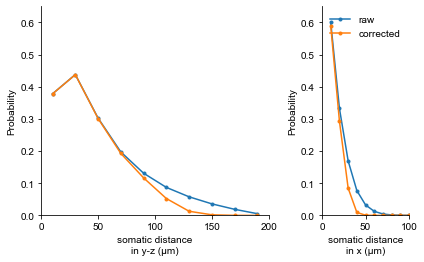

In [84]:
z1 = mlipop.som[cell_pair[:,0],:]
z2 = mlipop.som[cell_pair[:,1],:]
z1[:,1] = 0
z2[:,1] = 0

dist = np.linalg.norm(z1 - z2, axis=1)

n, x = np.histogram(dist, np.arange(0, 220, 20))
n = n/1e7
# n0, x0 = np.histogram(dist0, np.arange(201))

fig = plt.figure(figsize=(4*1.5,2.5*1.5))
gs = fig.add_gridspec(1, 3)
ax = fig.add_subplot(gs[0, 0:2])

xc = (x[:-1]+x[1:])/2
ax.plot(xc, n, '.-', label='raw')
ax.plot(xc, n*1/(1+np.exp((x[:-1]-105)/12)), '.-', label='corrected')
# ax.plot(x0[:-1], n0)
ax.set(
    xlim=[0, 200], ylim=[0, 0.65],
    xlabel='somatic distance\nin y-z (μm)',
    ylabel='Probability'
)
# ax.legend()

z1 = mlipop.som[cell_pair[:,0],:]
z2 = mlipop.som[cell_pair[:,1],:]
z1[:,1:] = 0
z2[:,1:] = 0

dist = np.linalg.norm(z1 - z2, axis=1)

n, x = np.histogram(dist,np.arange(5, 111, 10))
n = n/1e7

ax = fig.add_subplot(gs[0, 2])
xc = (x[:-1]+x[1:])/2
ax.plot(xc, n, '.-', label='raw')
ax.plot(xc, n*1/(1+np.exp((x[:-1]-25)/5)), '.-', label='corrected')
ax.set(
    xlim=[0, 100], ylim=[0, 0.65],
    xlabel='somatic distance\nin x (μm)',
    ylabel='Probability'
)
ax.legend()

plt.tight_layout()
plt.savefig('ngap_vs_dist.png', dpi=600)

## Chemical